In [1]:
from __future__ import print_function
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from pandas_ml import ConfusionMatrix

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn import svm
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
base_data=pd.read_csv('F:/DataScience/unsupervised-example/Customers2.csv')

In [3]:
base_data.head()

,CustomerID,Genre,Age,Annual Income (€K),Spending Score
0,23453456,Male,20,15,39
1,23453457,Male,20,15,81
2,23453458,Female,21,16,6
3,23453459,Female,23,16,77
4,23453460,Female,655,17,40


In [21]:
#converting the age variables to dummy variables#
#creating dummy codes for the caegorical variables#
New_base=pd.get_dummies(base_data, columns=["Genre"], prefix=["Person"])

In [22]:
New_base.head()

,CustomerID,Age,Annual Income (€K),Spending Score,Person_Female,Person_Male
0,23453456,20,15,39,0,1
1,23453457,20,15,81,0,1
2,23453458,21,16,6,1,0
3,23453459,23,16,77,1,0
4,23453460,655,17,40,1,0


In [23]:
New_base.columns

Index(['CustomerID', 'Age', 'Annual Income (€K)', 'Spending Score ',
       'Person_Female', 'Person_Male'],
      dtype='object')

In [24]:
#subsetting the data for clustering##
cluster_data=New_base[[ 'Age', 'Annual Income (€K)', 'Spending Score ','Person_Female', 'Person_Male']]

In [25]:
cluster_data.head()

,Age,Annual Income (€K),Spending Score,Person_Female,Person_Male
0,20,15,39,0,1
1,20,15,81,0,1
2,21,16,6,1,0
3,23,16,77,1,0
4,655,17,40,1,0


In [31]:
kmeans1 = KMeans(n_clusters=3).fit(cluster_data)

In [32]:
label = kmeans1.labels_
print(label)

[0 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [33]:
#checking the optimal number of clusters using silhouette method#
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(cluster_data)
    label = kmeans.labels_
    sil_coeff = silhouette_score(cluster_data, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.9148914125226576
For n_clusters=3, The Silhouette Coefficient is 0.29292304245644535
For n_clusters=4, The Silhouette Coefficient is 0.3796517214408109
For n_clusters=5, The Silhouette Coefficient is 0.4092034441563589
For n_clusters=6, The Silhouette Coefficient is 0.45880809967800384
For n_clusters=7, The Silhouette Coefficient is 0.4560506413639429
For n_clusters=8, The Silhouette Coefficient is 0.44089430335855784
For n_clusters=9, The Silhouette Coefficient is 0.43269446796175215
For n_clusters=10, The Silhouette Coefficient is 0.4065448057383393


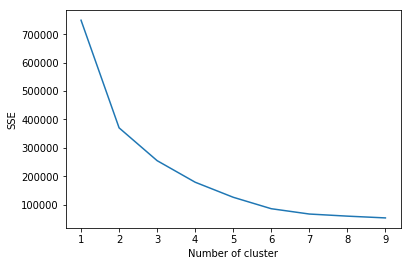

In [34]:
#elbow curve for identifying the cluster number#
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(cluster_data)
    cluster_data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [35]:
#getting optimal number of cluster as 6 from both the above methods
#clustering the data based on Annual Income/Spending Sore/ Gender
from sklearn.cluster import KMeans

num_clusters = 3

km = KMeans(n_clusters=num_clusters)

%time km.fit(cluster_data)

clusters = km.labels_.tolist()

Wall time: 70.1 ms


In [36]:
#appending the unsupervised tags to the base data#
cluster_data['clusters']=clusters
cluster_data.head()

,Age,Annual Income (€K),Spending Score,Person_Female,Person_Male,clusters
0,20,15,39,0,1,0
1,20,15,81,0,1,1
2,21,16,6,1,0,0
3,23,16,77,1,0,1
4,655,17,40,1,0,2


In [38]:
#converting the k means labels to categories#
cluster_data["category"] = np.where(cluster_data['clusters']==0, 'zero',(np.where(cluster_data['clusters']==1,'one','two')))

In [39]:
cluster_data.head()

,Age,Annual Income (€K),Spending Score,Person_Female,Person_Male,clusters,category
0,20,15,39,0,1,0,zero
1,20,15,81,0,1,1,one
2,21,16,6,1,0,0,zero
3,23,16,77,1,0,1,one
4,655,17,40,1,0,2,two


In [40]:
cluster_data.columns

Index(['Age', 'Annual Income (€K)', 'Spending Score ', 'Person_Female',
       'Person_Male', 'clusters', 'category'],
      dtype='object')

In [44]:
X=cluster_data[['Age', 'Annual Income (€K)', 'Spending Score ', 'Person_Female','Person_Male']]
y=cluster_data['category']

In [43]:
#dividing the data in training and test#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

dt = DecisionTreeClassifier() 

clf = AdaBoostClassifier(n_estimators=50, base_estimator=dt,learning_rate=1).fit(X_train, y_train)
predicted_val = clf.predict(X_test)


print ('Accuracy:', accuracy_score(y_test, predicted_val))
print ('F1 score:', f1_score(y_test, predicted_val, average='micro'))
print ('Recall:', recall_score(y_test, predicted_val, average='micro'))
print ('Precision:', precision_score(y_test, predicted_val, average='micro'))
print ('\n clasification report:\n', classification_report(y_test, predicted_val))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_val))



Accuracy: 0.9387755102040817
F1 score: 0.9387755102040817
Recall: 0.9387755102040817
Precision: 0.9387755102040817

 clasification report:
               precision    recall  f1-score   support

         one       0.94      0.94      0.94        17
         two       0.00      0.00      0.00         0
        zero       0.97      0.94      0.95        32

   micro avg       0.94      0.94      0.94        49
   macro avg       0.64      0.63      0.63        49
weighted avg       0.96      0.94      0.95        49


 confussion matrix:
 [[16  0  1]
 [ 0  0  0]
 [ 1  1 30]]


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [55]:
print ('Accuracy:', accuracy_score(y_test, predicted_val))
print ('F1 score:', f1_score(y_test, predicted_val, average=None))
print ('Recall:', recall_score(y_test, predicted_val, average=None))
print ('Precision:', precision_score(y_test, predicted_val, average=None))
print ('\n clasification report:\n', classification_report(y_test, predicted_val))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_val))


Accuracy: 0.9387755102040817
F1 score: [0.94117647 0.         0.95238095]
Recall: [0.94117647 0.         0.9375    ]
Precision: [0.94117647 0.         0.96774194]

 clasification report:
               precision    recall  f1-score   support

         one       0.94      0.94      0.94        17
         two       0.00      0.00      0.00         0
        zero       0.97      0.94      0.95        32

   micro avg       0.94      0.94      0.94        49
   macro avg       0.64      0.63      0.63        49
weighted avg       0.96      0.94      0.95        49


 confussion matrix:
 [[16  0  1]
 [ 0  0  0]
 [ 1  1 30]]


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarnin

In [45]:
#create model on the training data#
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf=clf.fit(X_train, y_train)
#predicitng based on rf model for training data
Predicted_risk=clf.predict(X_train)
cm = ConfusionMatrix(y_train, Predicted_risk)
cm.print_stats()

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\HP\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
C:\Users\HP\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:236: RuntimeWarning

Confusion Matrix:

Predicted  one  two  zero  __all__
Actual                            
one         24    0    41       65
two          0    0     1        1
zero        36    0    53       89
__all__     60    0    95      155


Overall Statistics:

Accuracy: 0.4967741935483871
95% CI: (0.41556998150831137, 0.5781040759281049)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.9987107114909356
Kappa: -0.03598971722365034
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                      one         two       zero
Population                                   155         155        155
P: Condition positive                         65           1         89
N: Condition negative                         90         154         66
Test outcome positive                         60           0         95
Test outcome negative                         95         155         60
TP: True Positive                             24           0         53
TN: True Negative    

In [57]:
#predicitng based on rf model for test data
Predicted_risk_test=clf.predict(X_test)
cm1 = ConfusionMatrix(y_test, Predicted_risk_test)
cm1.print_stats()

Confusion Matrix:

Predicted  one  zero  __all__
Actual                       
one          1     4        5
zero         2     6        8
__all__      3    10       13


Overall Statistics:

Accuracy: 0.5384615384615384
95% CI: (0.25134548227030357, 0.807767558198712)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.9842959474425996
Kappa: -0.05405405405405408
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                      one       zero
Population                                    13         13
P: Condition positive                          5          8
N: Condition negative                          8          5
Test outcome positive                          3         10
Test outcome negative                         10          3
TP: True Positive                              1          6
TN: True Negative                              6          1
FP: False Positive                             2          4
FN: False Negative                            

C:\Users\HP\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


# we have got close to 92%accuracy on test set based on 4 clusters#

In [58]:
 from sklearn import svm
#SVM model training data #
clf = svm.SVC(kernel='linear', gamma=1)
clf.fit(X_train, y_train)
Predicted_risk=clf.predict(X_train)
cm = ConfusionMatrix(y_train, Predicted_risk)
cm.print_stats()


C:\Users\HP\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


Confusion Matrix:

Predicted  one  two  zero  __all__
Actual                            
one         24    0    41       65
two          0    0     1        1
zero        39    1    49       89
__all__     63    1    91      155


Overall Statistics:

Accuracy: 0.47096774193548385
95% CI: (0.39039532099526136, 0.5526712876181183)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.9986201979551393
Kappa: -0.07438715131022824
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                      one         two       zero
Population                                   155         155        155
P: Condition positive                         65           1         89
N: Condition negative                         90         154         66
Test outcome positive                         63           1         91
Test outcome negative                         92         154         64
TP: True Positive                             24           0         49
TN: True Negative   

In [59]:
#predicitng based on rf model for test data
Predicted_risk_test=clf.predict(X_test)
cm1 = ConfusionMatrix(y_test, Predicted_risk_test)
cm1.print_stats()

population: 0
P: 0
N: 0
PositiveTest: 0
NegativeTest: 0
TP: 0
TN: 0
FP: 0
FN: 0
TPR: nan
TNR: nan
PPV: nan
NPV: nan
FPR: nan
FDR: nan
FNR: nan
ACC: nan
F1_score: nan
MCC: nan
informedness: nan
markedness: nan
prevalence: nan
LRP: nan
LRN: nan
DOR: nan
FOR: nan


C:\Users\HP\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:191: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.P)
C:\Users\HP\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:213: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TN) / self.N)
C:\Users\HP\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
C:\Users\HP\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:259: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TN) / self.NegativeTest)
C:\Users\HP\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:181: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FP) / self.N)
C:\Users\HP\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:267: RuntimeWa